# COMP30850 Assignment -2
### <font color = dark red>SURABHI AGARWAL - 17203535</font>

> - The objective of this assignment is to construct and characterise a range of network representations, created from pre-collected Twitter data for a specific Twitter List of user accounts which are related to the a specific topic.
> - I have chosen the ***business topic***

# Table of Contents:

> - [Task 1: Follower Network](#task-1)
    - A **Twitter follower network** consists of all follower-followee relations between a set of Twitter users. Once we have collected follower data from Twitter, we create a directed network with edges, where the source is the follower user and the target is the user being followed (the followee).
> - [Task 2: Reply Network](#task-2)
    - Here nodes will be either users from the list or users from the wider Twitter platform - i.e. users who are not necessarily members of the list, but received replies from users on the list.
> - [Task 3: Mention Network](#task-3)
    - A **Twitter mention network** is a weighted directed network, where nodes are users, directed edges denote direction of mentions between users, and edge weights correspond to mention frequency.
> - [Task 4: User hashtag Network](#task-4)
    - A bipartite network, where one set of nodes will be users from the list, and the other set of nodes will be hashtags which appear in their tweets.
> - [Task 5: Hashtag co-occurence Network](#task-5)
    - A **hashtag co-occurrence network** is a weighted undirected network, where hashtags are represented by nodes, and edges exist between pairs of hashtags if they appear together in the same tweet at least once.


In [115]:
import json, itertools
from collections import Counter
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
import sys
#Snippet to ignore warning messages in graphs
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Task 1 : Follower Network:

 <a class="anchor" id="task-1"></a>
**_<font color= blue>Creating a follower network: </font>_**
> - a) Parsing the Friendhsips.csv file and creating an appropriate follower network using NetworkX.
> - b) Nodes represent the users and each each edge represents the relationship between the user and it's follower

In [117]:
#Loading the friendships.csv file containing the user and the follower
data = pd.read_csv("friendships.csv", sep='\t', header = None)
data

,0,1
0,apbusiness,bbcbusiness
1,apbusiness,business
2,apbusiness,businessinsider
3,apbusiness,bw
4,apbusiness,cnnbusiness
...,...,...
230,wsj,wsjbusiness
231,wsjecon,wsj
232,wsj,wsjecon
233,wsjecon,wsjbusiness


In [118]:
#Creating a directed network
g1 = nx.DiGraph()
for i, row in data.iterrows():
    # an edge represents the relation between follower and followee
    g1.add_edge( row[0], row[1])

In [119]:
#Printing the number of edges and nodes
g1.number_of_nodes(), g1.number_of_edges()

(30, 235)

In [120]:
#Printing all the edges in the network
for edge in g1.edges(data=True):
    print(edge)

('apbusiness', 'bbcbusiness', {})
('apbusiness', 'business', {})
('apbusiness', 'businessinsider', {})
('apbusiness', 'bw', {})
('apbusiness', 'cnnbusiness', {})
('apbusiness', 'fastcompany', {})
('apbusiness', 'forbes', {})
('apbusiness', 'foxbusiness', {})
('apbusiness', 'ft', {})
('apbusiness', 'ftfinancenews', {})
('apbusiness', 'harvardbiz', {})
('apbusiness', 'markets', {})
('apbusiness', 'marketwatch', {})
('apbusiness', 'nasdaq', {})
('apbusiness', 'nbcnewsbusiness', {})
('apbusiness', 'reutersbiz', {})
('apbusiness', 'thestreet', {})
('apbusiness', 'usatodaymoney', {})
('apbusiness', 'wsj', {})
('apbusiness', 'wsjbusiness', {})
('apbusiness', 'wsjecon', {})
('bbcbusiness', 'bbcworldbiz', {})
('bbcbusiness', 'business', {})
('bbcbusiness', 'bw', {})
('bbcbusiness', 'reutersbiz', {})
('business', 'bbcbusiness', {})
('business', 'businessinsider', {})
('business', 'bw', {})
('business', 'cnnbusiness', {})
('business', 'forbes', {})
('business', 'foxbusiness', {})
('business', 'ft

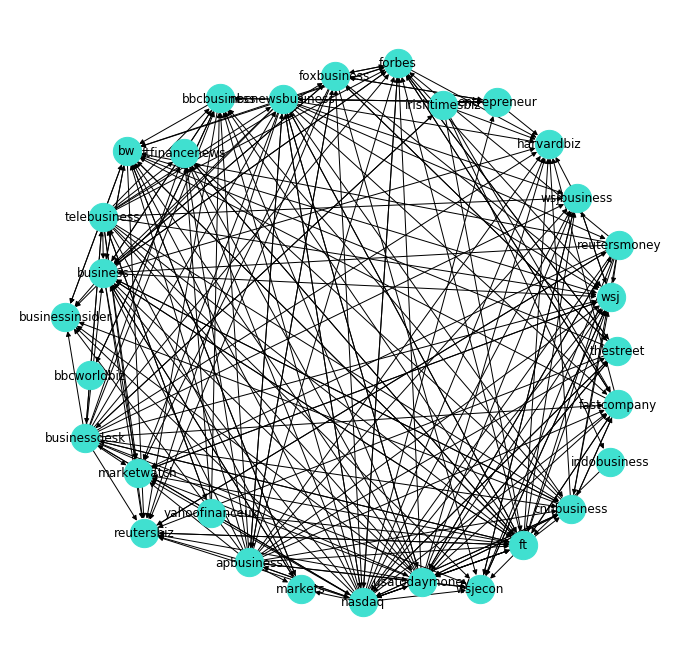

In [121]:
#Plotting the directed follower network where each node represents the user
plt.figure(figsize=(12,12))
pos = nx.spring_layout( g1, k = 4.4 )
nx.draw_networkx( g1, pos, with_labels=True, node_size=800, node_color="#40e0d0" )
plt.axis("off")
plt.show()

> - For Twitter follower networks, we might often look at the level of reciprocity, and which edges are reciprocated - i.e. - i.e. user $X$ follows user $Y$, and $Y$ follows $X$.
> - We can also construct an undirected version of the follower network, where we only keep reciprocal edges.

In [122]:
#In degree in a follower network gives people ranking according to their number of followes
in_deg = pd.Series(dict( g1.in_degree() ), name="in-degree")
pd.DataFrame(in_deg).sort_values(by="in-degree", ascending=False).head(10)

,in-degree
wsj,16
ft,15
business,14
reutersbiz,13
bw,13
harvardbiz,13
forbes,12
bbcbusiness,12
marketwatch,11
cnnbusiness,10


In [123]:
# check all unique pairs to look for reciprocity
for pair in itertools.combinations(g1.nodes(), r=2):
    if g1.has_edge( pair[0], pair[1] ) and g1.has_edge( pair[1], pair[0] ):
        print( "%s <--> %s" % pair )
        

apbusiness <--> foxbusiness
apbusiness <--> nasdaq
apbusiness <--> nbcnewsbusiness
bbcbusiness <--> business
bbcbusiness <--> bbcworldbiz
business <--> bw
business <--> cnnbusiness
business <--> forbes
business <--> foxbusiness
business <--> ft
business <--> markets
bw <--> ft
bw <--> markets
cnnbusiness <--> fastcompany
cnnbusiness <--> nasdaq
cnnbusiness <--> usatodaymoney
fastcompany <--> forbes
fastcompany <--> ft
forbes <--> foxbusiness
forbes <--> nasdaq
forbes <--> thestreet
foxbusiness <--> thestreet
foxbusiness <--> entrepreneur
ft <--> ftfinancenews
ft <--> nasdaq
ft <--> nbcnewsbusiness
ft <--> reutersbiz
ft <--> usatodaymoney
ft <--> businessdesk
marketwatch <--> wsj
nasdaq <--> nbcnewsbusiness
nasdaq <--> thestreet
nasdaq <--> usatodaymoney
nasdaq <--> businessdesk
nbcnewsbusiness <--> usatodaymoney
nbcnewsbusiness <--> entrepreneur
reutersbiz <--> reutersmoney
thestreet <--> usatodaymoney
usatodaymoney <--> reutersmoney
wsj <--> wsjbusiness
wsj <--> wsjecon
wsjbusiness <-

In [124]:
#constructing an undirected version of the follower network
ug = g1.to_undirected( reciprocal=True )
ug.number_of_nodes(), ug.number_of_edges()

(30, 45)

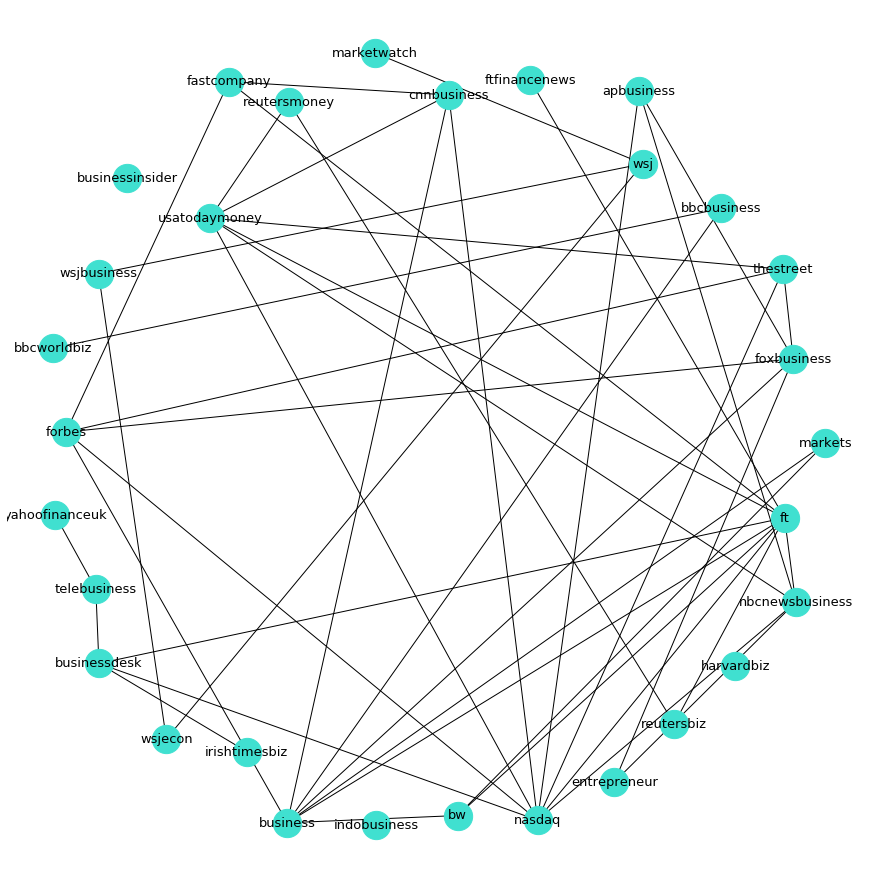

In [125]:
#Plotting the undirected follower network
plt.figure(figsize=(12,12))
pos = nx.spring_layout( ug, k = 100 )
nx.draw(ug,pos, with_labels = True, node_size=800, font_size=13, node_color="#40e0d0")

In [126]:
print("Number of nodes for Follower network: ", g1.number_of_nodes())
print("Number of edges for Follower network: ", g1.number_of_edges())
print("Density of Follower network: ", nx.density(g1))
print("Is Follower network directed?: ", nx.is_directed(g1))


Number of nodes for Follower network:  30
Number of edges for Follower network:  235
Density of Follower network:  0.27011494252873564
Is Follower network directed?:  True


In [127]:
#Performing a list of centrality measure to figure out the most important nodes
#Displaying ranking of the nodes by their degree centrality
deg_1 = nx.degree_centrality(g1)
s_1 = pd.Series(deg_1)
dataset_1 = pd.DataFrame(s_1,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_1 = nx.betweenness_centrality(g1)
dataset_1["betweenness"] = pd.Series(bet_1)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_1 = nx.closeness_centrality(g1)
dataset_1["closeness"] = pd.Series(close_1)

eig_1 = nx.eigenvector_centrality(g1)
dataset_1["eigenvector"] = pd.Series(eig_1)

dataset_1["norm_eigenvector"] = dataset_1["eigenvector"]/max(dataset_1["eigenvector"])

# display the DataFrame sorted by degree centrality
dataset_1.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
ft,1.103448,0.196137,0.570043,0.255387,0.674354
nasdaq,1.103448,0.084045,0.444912,0.174715,0.461338
usatodaymoney,0.965517,0.025446,0.456034,0.149790,0.395523
business,0.896552,0.077669,0.570043,0.289415,0.764204
nbcnewsbusiness,0.862069,0.039645,0.434319,0.110969,0.293016
apbusiness,0.827586,0.012963,0.337803,0.058815,0.155302
businessdesk,0.793103,0.087560,0.388114,0.065421,0.172746
telebusiness,0.724138,0.060674,0.309176,0.025530,0.067414
forbes,0.689655,0.021744,0.521182,0.227557,0.600868
bw,0.655172,0.032948,0.552769,0.275608,0.727746


In [128]:
# Get ranking of the nodes, where 1 indicates the highest rank
ds1=dataset_1["betweenness"].rank(ascending = False)
ds1.sort_values()

ft                  1.0
businessdesk        2.0
nasdaq              3.0
business            4.0
bbcbusiness         5.0
telebusiness        6.0
nbcnewsbusiness     7.0
bw                  8.0
markets             9.0
foxbusiness        10.0
irishtimesbiz      11.0
usatodaymoney      12.0
reutersbiz         13.0
forbes             14.0
wsj                15.0
apbusiness         16.0
cnnbusiness        17.0
reutersmoney       18.0
wsjbusiness        19.0
fastcompany        20.0
thestreet          21.0
entrepreneur       22.0
wsjecon            23.0
ftfinancenews      24.0
harvardbiz         27.5
bbcworldbiz        27.5
businessinsider    27.5
yahoofinanceuk     27.5
marketwatch        27.5
indobusiness       27.5
Name: betweenness, dtype: float64


**_<font color= blue>Analysis of the Follower Network: </font>_**
> - a) Nodes represent the users and each each edge represents the relationship between the user and it's follower and the network is directed.
> - b) The nodes with higher in-degree value are supposed to be influencers with a larger following, hence in the above network, we have wsj with the largest number of followers and hence they are the influencers in this network.
> - c) Through our centrality measures,we can also note that ft have the highest stats and the highest rank in terms of betweeness.

# Task 2 : Reply Network:
 <a class="anchor" id="task-2"></a>
 
**_<font color= blue>Creating a reply network: </font>_**
> - a) Parsing the tweets.jsonl file for the tweets and the user data for creating an appropriate reply network using NetworkX.
> - b) Here nodes will be either users from the list or users from the wider Twitter platform - i.e. users who are not necessarily members of the list, but received replies from users on the list.

In [129]:
#Parsing the tweets jsonl data
fin = open( "tweets.jsonl", "r" )
tweets = []
# process the file line-by-line
for line in fin.readlines():
    line = line.strip()
    # each line contains a JSON document, representing a single tweet
    tweet = json.loads(line)
    tweets.append(tweet)
fin.close()

print("Read %d tweets" % len(tweets))

Read 15000 tweets


In [130]:
#Storing twitter data in a pandas dataframe
df = pd.DataFrame(tweets)

In [131]:
#dropping columns which are not useful
df = df.drop( ['created_at',
               'display_text_range',
        'truncated',
               'favorited', 'retweeted','possibly_sensitive', 'lang', 'retweeted_status', 'extended_entities',
        'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 
        'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status',
        'source', 'geo', 'coordinates', 'place', 'contributors', 'retweet_count', 'favorite_count', 'in_reply_to_status_id'], axis=1 )





In [132]:
#Printing dataframe
df.head(10)

,id,id_str,full_text,entities,in_reply_to_status_id_str,in_reply_to_screen_name,user
0,1226909731697987584,1226909731697987584,https://t.co/4Kox9QWRA7,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 91478624, 'id_str': '91478624', 'name':..."
1,1227980209628106752,1227980209628106752,RT @Number1AnnaJo: Why the Myth of the College...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 19407053, 'id_str': '19407053', 'name':..."
2,1228012551809703938,1228012551809703938,RT @jonathanjosephs: Have you heard of #Guanxi...,"{'hashtags': [{'text': 'Guanxi', 'indices': [3...",None,None,"{'id': 621523, 'id_str': '621523', 'name': 'BB..."
3,1227705211550085128,1227705211550085128,Kohl's cuts 250 jobs while arguing that it is ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 20562637, 'id_str': '20562637', 'name':..."
4,1220284654584041473,1220284654584041473,RT @BBCBusiness: Two weeks of leave for UK par...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 621523, 'id_str': '621523', 'name': 'BB..."
5,1227273162200580097,1227273162200580097,Fed Chairman Jerome Powell told lawmakers the ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 16334857, 'id_str': '16334857', 'name':..."
6,1228034555728351233,1228034555728351233,I still plan to be debt-free — it will just ta...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 20562637, 'id_str': '20562637', 'name':..."
7,1223789391899963392,1223789391899963392,4 Mindsets That Earn You More Customer Referra...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 19407053, 'id_str': '19407053', 'name':..."
8,1228372092036534272,1228372092036534272,How the 'Gratitude Effect' Can Reshape Your Li...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 19407053, 'id_str': '19407053', 'name':..."
9,1226678140614905856,1226678140614905856,Banks keep raising the limit on people’s credi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,None,"{'id': 67358777, 'id_str': '67358777', 'name':..."


In [133]:
fin = open( "list_members.jsonl", "r" )
users = []
# process the file line-by-line
for line in fin.readlines():
    line = line.strip()
    # each line contains a JSON document, representing a single tweet
    user = json.loads(line)
    users.append(user)
fin.close()

In [134]:
user_data = pd.DataFrame(users)

In [135]:
g2 = nx.DiGraph()

n_df=df.loc[df['in_reply_to_screen_name'] > '0']
print(n_df.shape)

members = set()

for i, row in user_data.iterrows():
    members.add(row['screen_name'])
    
    
for i, row in n_df.iterrows():
        if row['user']['screen_name'] in members and row['user']['screen_name'] != row['in_reply_to_screen_name']:
            g2.add_edge(row['user']['name'], row['in_reply_to_screen_name'])

(271, 7)


In [136]:
#Printing the number of edges
g2.number_of_edges()

26

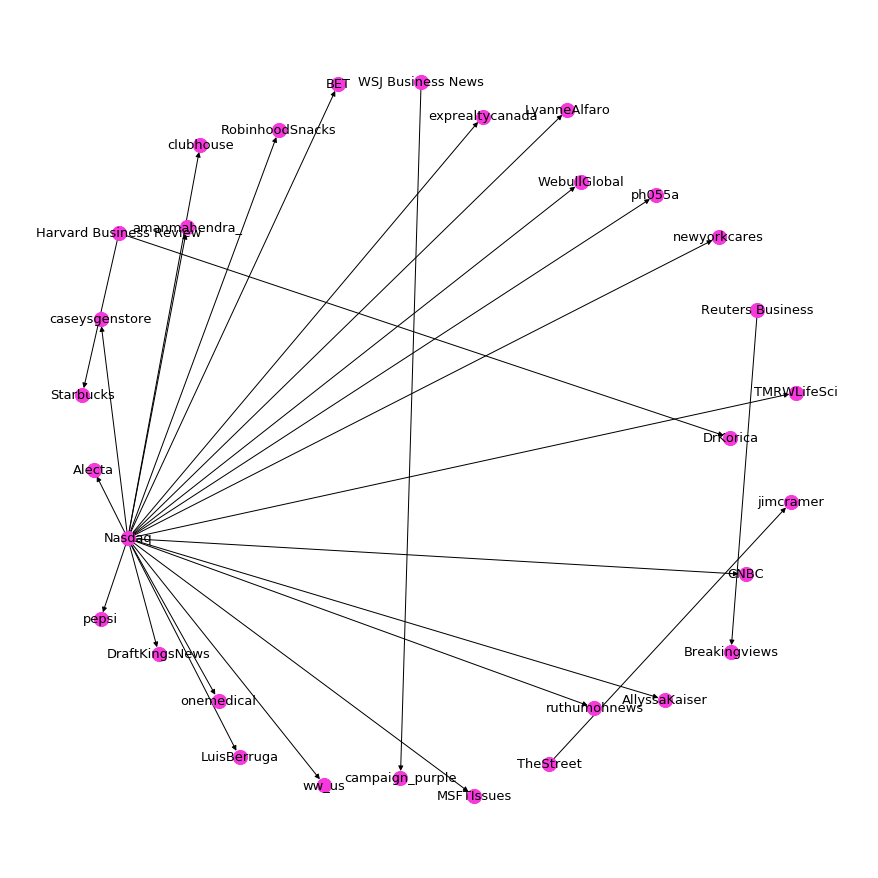

In [137]:
#Printing the reply network using matplotlib
plt.figure(figsize=(12,12))
pos = nx.spring_layout( g2, k = 100 )
nx.draw(g2,pos, with_labels = True, node_size=200, font_size=13, node_color="#f638dc")

In [138]:
print("Number of nodes for Reply network: ", g2.number_of_nodes())
print("Number of edges for Reply network: ", g2.number_of_edges())
print("Density of Reply network: ", nx.density(g2))
print("Is Reply network directed?: ", nx.is_directed(g2))

Number of nodes for Reply network:  31
Number of edges for Reply network:  26
Density of Reply network:  0.02795698924731183
Is Reply network directed?:  True


In [139]:
#Performing a list of centrality measure to figure out the most important nodes
#Displaying ranking of the nodes by their degree centrality
deg_2 = nx.degree_centrality(g2)
s_2 = pd.Series(deg_2)
dataset_2 = pd.DataFrame(s_2,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_2 = nx.betweenness_centrality(g2)
dataset_2["betweenness"] = pd.Series(bet_2)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_2 = nx.closeness_centrality(g2)
dataset_2["closeness"] = pd.Series(close_2)


# display the DataFrame sorted by degree centrality
dataset_2.sort_values(['degree_centrality', 'betweenness'],ascending=False).head(10)

,degree_centrality,betweenness,closeness
Nasdaq,0.700000,0.0,0.000000
Harvard Business Review,0.066667,0.0,0.000000
WebullGlobal,0.033333,0.0,0.033333
RobinhoodSnacks,0.033333,0.0,0.033333
DraftKingsNews,0.033333,0.0,0.033333
TMRWLifeSci,0.033333,0.0,0.033333
newyorkcares,0.033333,0.0,0.033333
CNBC,0.033333,0.0,0.033333
pepsi,0.033333,0.0,0.033333
clubhouse,0.033333,0.0,0.033333



**_<font color= blue>Analysis of the Reply Network: </font>_**
> - a) Here nodes will be either users from the list or users from the wider Twitter platform - i.e. users who are not necessarily members of the list, but received replies from users on the list.
> - b) Through our centrality measures,we can also note that Nasdaq have the highest stats
> - c) Our characteristics also confirm that the network is directed

# Task 3 : Mention Network:

 <a class="anchor" id="task-3"></a>
**_<font color= blue>Creating a mention network: </font>_**
> - a) Creating an appropriate mention network using NetworkX and twitter data.
> - b) Here nodes will be users from the wider Twitter platform - i.e. users who are not necessarily members of the list, but were mentioned in tweets by users on the list.

In [140]:
#Creating the dircted mention network
g3 = nx.DiGraph()
#Looping through the dataframe
for i, row in df.iterrows():
    #Looping through the user mentions list 
    for j in range(len(row['entities']['user_mentions'])):
        for k in row['entities']['user_mentions'][j]:
            #Checking if user is the mentioned user in the user_mentioned list
                #If user is found, then we add the edge
            g3.add_edge(row['user']['name'], row['entities']['user_mentions'][j]['name'])
                             

In [141]:
#Printing the number of edges
g3.number_of_edges()

1835

In [142]:
#Calculating the weight of edges in degree and printing them in a sorted fashion
# Users with high weighted in-degree are most frequently mentioned by other users in their tweets.
in_deg = pd.Series(dict( g3.in_degree(weight="weight") ), name="w-in-degree")
pd.DataFrame(in_deg).sort_values(by="w-in-degree", ascending=False).head(10)

,w-in-degree
The Associated Press,4
Bloomberg Live,3
Yahoo Finance,3
Janet Lorin,3
Oprah Winfrey,3
The Wall Street Journal,3
Netflix US,3
CNBC,3
Businessweek,3
Art Hogan,3


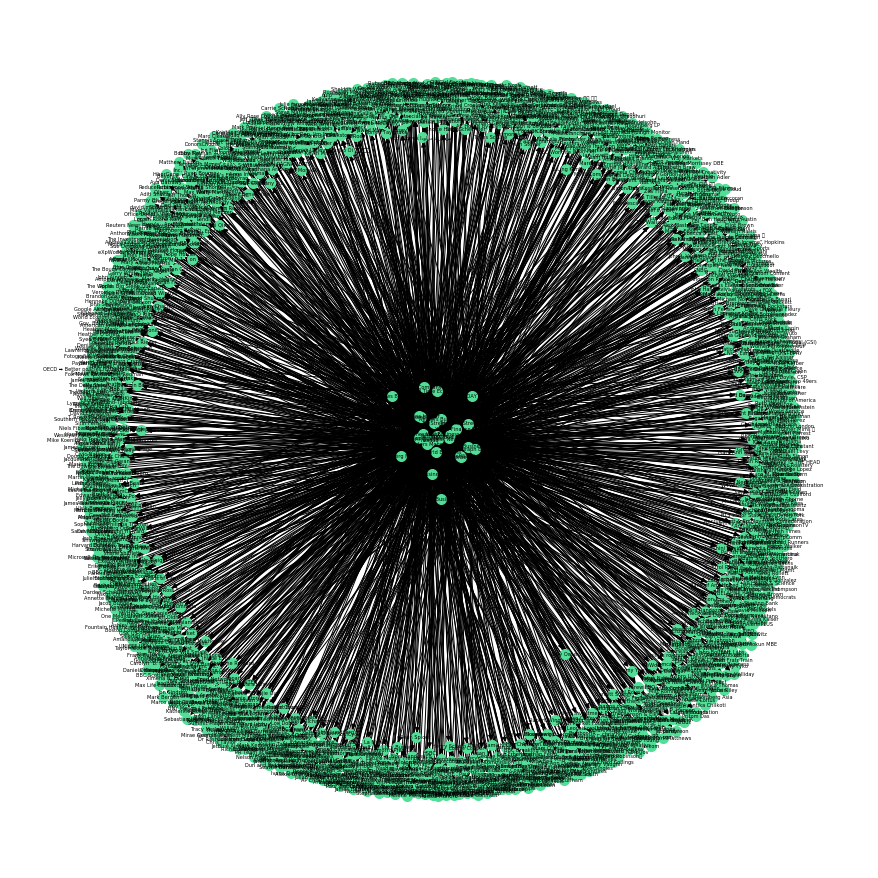

In [143]:
#Printing the directed mention network
plt.figure(figsize=(12,12))
nx.draw(g3, with_labels = True, node_size=100, font_size=5, node_color="#52de97")


In [144]:
print("Number of nodes for mention network: ", g3.number_of_nodes())
print("Number of edges for mention network: ", g3.number_of_edges())
print("Density of mention network: ", nx.density(g3))
print("Is mention network directed?: ", nx.is_directed(g3))

Number of nodes for mention network:  1727
Number of edges for mention network:  1835
Density of mention network:  0.0006156061355299681
Is mention network directed?:  True


In [145]:
#Displaying ranking of the nodes by their degree centrality
deg_3 = nx.degree_centrality(g3)
s_3 = pd.Series(deg_3)
dataset_3 = pd.DataFrame(s_3,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_3 = nx.betweenness_centrality(g3)
dataset_3["betweenness"] = pd.Series(bet_3)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_3 = nx.closeness_centrality(g3)
dataset_3["closeness"] = pd.Series(close_3)

eig_3 = nx.eigenvector_centrality(g3)
dataset_3["eigenvector"] = pd.Series(eig_3)

dataset_3["norm_eigenvector"] = dataset_3["eigenvector"]/max(dataset_3["eigenvector"])

# display the DataFrame sorted by degree centrality
dataset_3.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Nasdaq,0.177868,0.00000,0.000000,1.418374e-06,5.867516e-06
Reuters Money,0.130939,0.00000,0.000000,1.418374e-06,5.867516e-06
Entrepreneur,0.080533,0.00000,0.000000,1.418374e-06,5.867516e-06
WSJ Business News,0.064311,0.00000,0.000000,1.056771e-14,4.371640e-14
Telegraph Business,0.059676,0.00000,0.000000,1.418374e-06,5.867516e-06
BBC World Business,0.046929,0.00002,0.000579,8.058513e-02,3.333636e-01
FOX Business,0.044612,0.00000,0.000000,1.418374e-06,5.867516e-06
AP Business News,0.044032,0.00000,0.000000,1.418374e-06,5.867516e-06
Harvard Business Review,0.041715,0.00000,0.000000,1.418374e-06,5.867516e-06
Business Insider,0.039977,0.00000,0.000000,1.418374e-06,5.867516e-06



**_<font color= blue>Analysis of the Mention Network: </font>_**
> - a) Here nodes will be users from the wider Twitter platform - i.e. users who are not necessarily members of the list, but were mentioned in tweets by users on the list.
> - b) Through our centrality measures,we can also note that Nasdaq have the highest stats
> - c) Our characteristics also confirm that the network is directed
> - d) Also, users with high weighted in-degree are most frequently mentioned by other users in their tweets, over here we have 'The Associated Press' with the highest weighted in-degree value.

# Task 4 : User-Hashtag Bipartite Network:

 <a class="anchor" id="task-4"></a>
**_<font color= blue>Creating a user-hashtag network: </font>_**
> - a) Creating an appropriate bipartite network using NetworkX and twitter data.
> - b) Here one set of nodes will be users  from the list, and the other set of nodes will be hashtags which appear in their tweets.

In [146]:
#Creating the bipartite network
b = nx.Graph()

In [147]:
# read in the JSONL text
users = []
fin = open("list_members.jsonl","r")
# process each line as a separate JSON document
for line in fin.readlines():
    user = json.loads( line )
    users.append( user )
fin.close()
print("Read %d user profiles" % len(users))

Read 30 user profiles


In [148]:
#Creating a list of user names
user_names = []
for i, row in df.iterrows():
    for k in row['user']:
            user_names.append(row['user']['name'])

In [149]:
#Creating a list of hashtags appearing in the tweets
hashtag = []
for i, row in df.iterrows():
    for j in range(len(row['entities']['hashtags'])):
        for k in row['entities']['hashtags'][j]:
            hashtag.append(row['entities']['hashtags'][j]['text'])

In [150]:
#Creating user-hastag pairs
pairs = []
for i, row in df.iterrows():
    for j in range(len(row['entities']['hashtags'])):
        for k in row['entities']['hashtags'][j]:
            pairs.append((row['user']['name'], row['entities']['hashtags'][j]['text']))
pairs

[('BBC Business', 'Guanxi'),
 ('BBC Business', 'Guanxi'),
 ('BBC Business', 'China'),
 ('BBC Business', 'China'),
 ('Reuters Money', 'LifeLessons'),
 ('Reuters Money', 'LifeLessons'),
 ('Telegraph Business', 'BrexitDay'),
 ('Telegraph Business', 'BrexitDay'),
 ('Telegraph Business', 'economy'),
 ('Telegraph Business', 'economy'),
 ('Telegraph Business', 'property'),
 ('Telegraph Business', 'property'),
 ('Nasdaq', 'IRO'),
 ('Nasdaq', 'IRO'),
 ('Nasdaq', 'IRO'),
 ('Nasdaq', 'IRO'),
 ('Nasdaq', 'IntroToAnIRO'),
 ('Nasdaq', 'IntroToAnIRO'),
 ('Yahoo Finance UK', 'LeadersDebate'),
 ('Yahoo Finance UK', 'LeadersDebate'),
 ('Yahoo Finance UK', 'ITVDebate'),
 ('Yahoo Finance UK', 'ITVDebate'),
 ('Nasdaq', 'PuppyBowlXVI'),
 ('Nasdaq', 'PuppyBowlXVI'),
 ('Nasdaq', 'DogBowl'),
 ('Nasdaq', 'DogBowl'),
 ('Nasdaq', 'SBLIV'),
 ('Nasdaq', 'SBLIV'),
 ('Reuters Money', 'ReutersSummits'),
 ('Reuters Money', 'ReutersSummits'),
 ('Forbes', 'MeToo'),
 ('Forbes', 'MeToo'),
 ('Telegraph Business', 'coronavir

In [151]:
# Create the bipartite network
b = nx.Graph()
user_nodes, htag_nodes = set(), set()
for p in pairs:
    user = p[0]
    htag = p[1]    
    # create the nodes, users and hashtags
    if not user in user_nodes:
        b.add_node(user, bipartite=0)
        user_nodes.add(user)
    if not htag in htag_nodes:
        b.add_node(htag, bipartite=1)
        htag_nodes.add(htag)    
    # create the edge 
    htag_nodes.add(htag)
    b.add_edge( user, htag )
print("Created bipartite network with %d nodes and %d edges" % ( b.number_of_nodes(), b.number_of_edges() ) )

Created bipartite network with 553 nodes and 594 edges


In [152]:
#Checking if the network is bipartite
bipartite.is_bipartite(b)

True

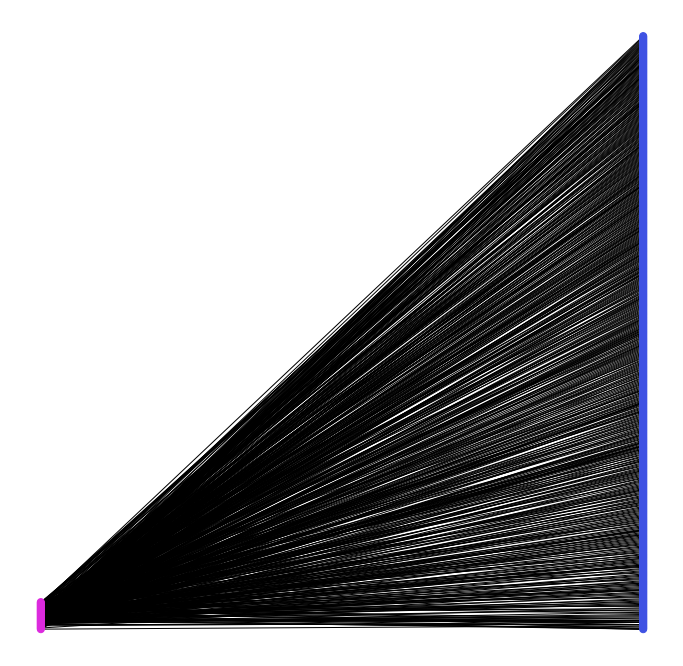

In [153]:
# manually set the node colours and positions
color_map, pos = {}, {}
for i, node in enumerate(user_nodes):
    pos[node] = (0, i*10)
    color_map[node] = "#dc2ade"
for i, node in enumerate(htag_nodes):
    pos[node] = (1, i*10)
    color_map[node] = "#3f52e3"
colors = [color_map[node] for node in b.nodes()]
# draw the network    
plt.figure(figsize=(12,12))
nx.draw_networkx(b, pos=pos, with_labels=False, 
        node_size = 50,
        font_size = 9,
        node_color = colors)
plt.axis("off")
plt.show()

In [154]:
# note we specify only the hashtag nodes
htag_wdegrees = dict(b.degree(htag_nodes, weight="weight"))
# convert to a Pandas series and sort it
htag_swdeg = pd.Series(htag_wdegrees, name="w-degree")
htag_swdeg = htag_swdeg.sort_values(ascending=False)
# display the top 10
pd.DataFrame(htag_swdeg.head(10))

,w-degree
coronavirus,8
Brexit,6
Apple,4
tax,4
MeToo,4
Coronavirus,4
China,3
ESG,3
ValentinesDay,3
Oscars,3


In [155]:
# note we specify only the user nodes
user_wdegrees = dict(b.degree(user_nodes, weight="weight"))
# convert to a Pandas series and sort it
user_swdeg = pd.Series(user_wdegrees, name="w-degree")
user_swdeg = user_swdeg.sort_values(ascending=False)
# display the top 10
pd.DataFrame(user_swdeg.head(10))

,w-degree
Nasdaq,147
Telegraph Business,98
BBC Business,64
BBC World Business,41
Reuters Money,39
Irish Times Business,37
Yahoo Finance UK,25
USA TODAY Money,25
Entrepreneur,13
AP Business News,13


In [156]:
for e in b.edges():
    print(e)

('BBC Business', 'Guanxi')
('BBC Business', 'China')
('BBC Business', 'WorldBusinessReport')
('BBC Business', 'ceosecrets')
('BBC Business', 'entrepreneur')
('BBC Business', 'business')
('BBC Business', 'india')
('BBC Business', 'technology')
('BBC Business', 'WednesdayWisdom')
('BBC Business', 'wakeuptomoney')
('BBC Business', 'WorklifeIndia')
('BBC Business', 'wef2020')
('BBC Business', 'wef20')
('BBC Business', 'sustainability')
('BBC Business', 'BrexitDay')
('BBC Business', 'Retail')
('BBC Business', 'Coronavirus')
('BBC Business', 'disinfo')
('BBC Business', 'CEOsecrets')
('BBC Business', 'nadorcott')
('BBC Business', 'Davos2020')
('BBC Business', 'BusinessDaily')
('BBC Business', 'BBCWorklife')
('BBC Business', 'WEF2020')
('BBC Business', 'coronavirus')
('BBC Business', 'bbctheboss')
('BBC Business', 'MyMoney')
('BBC Business', 'reshuffle')
('BBC Business', 'davos')
('BBC Business', 'FridayThoughts')
('BBC Business', 'environment')
('BBC Business', 'climatechange')
('BBC Business

In [157]:
print("Number of nodes for user-hashtag network: ", b.number_of_nodes())
print("Number of edges for user-hashtag network: ", b.number_of_edges())
print("Density of user-hashtag network: ", nx.density(b))
print("Is user-hashtag network directed?: ", nx.is_directed(b))

Number of nodes for user-hashtag network:  553
Number of edges for user-hashtag network:  594
Density of user-hashtag network:  0.0038918153942920043
Is user-hashtag network directed?:  False


In [158]:
#Displaying ranking of the nodes by their degree centrality
deg_4 = nx.degree_centrality(b)
s_4 = pd.Series(deg_4)
dataset_4 = pd.DataFrame(s_4,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_4 = nx.betweenness_centrality(b)
dataset_4["betweenness"] = pd.Series(bet_4)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_4 = nx.closeness_centrality(b)
dataset_4["closeness"] = pd.Series(close_4)

eig_4 = nx.eigenvector_centrality(b)
dataset_4["eigenvector"] = pd.Series(eig_4)

dataset_4["norm_eigenvector"] = dataset_4["eigenvector"]/max(dataset_4["eigenvector"])

# display the DataFrame sorted by degree centrality
dataset_4.sort_values(['degree_centrality', 'betweenness', 'eigenvector', 'norm_eigenvector'],ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Nasdaq,0.266304,0.444821,0.339104,0.702220,1.000000
Telegraph Business,0.177536,0.347134,0.335114,0.060557,0.086236
BBC Business,0.115942,0.256848,0.313785,0.046574,0.066324
BBC World Business,0.074275,0.180934,0.301958,0.013743,0.019571
Reuters Money,0.070652,0.115630,0.284531,0.023283,0.033157
Irish Times Business,0.067029,0.113718,0.295689,0.011468,0.016331
Yahoo Finance UK,0.045290,0.081626,0.198885,0.000120,0.000171
USA TODAY Money,0.045290,0.079049,0.233057,0.006217,0.008853
TheStreet,0.023551,0.041466,0.141950,0.000002,0.000003
AP Business News,0.023551,0.039211,0.246265,0.001188,0.001691


In [159]:
# Get ranking of the nodes, where 1 indicates the highest rank
ds4=dataset_4["betweenness"].rank(ascending = False)
ds4.sort_values()

Nasdaq                     1.0
Telegraph Business         2.0
BBC Business               3.0
BBC World Business         4.0
coronavirus                5.0
                         ...  
GalaxyZFlip              311.0
IPOd                     311.0
RetirementDaily          311.0
cabinetreshuffle         311.0
NationalTechnologyDay    311.0
Name: betweenness, Length: 553, dtype: float64


**_<font color= blue>Analysis of the User Hashtag Network: </font>_**
> - a) Here one set of nodes will be users  from the list, and the other set of nodes will be hashtags which appear in their tweets.
> - b) Through our weighted in-degree values, we can also note that Nasdaq have the highest stats in terms of the most active users, whereas #coronavirus has been the most actively used hashatg
> - c) Our characteristics also confirm that the network is not directed
> - d) Also,based on our centrality measures, Nasdaq have the highest stats and prove to be the most important nodes.

# Task 5 : Hashtag-Co-occurence Network:

 <a class="anchor" id="task-5"></a>
**_<font color= blue>Creating a Hashtag co-occurence network: </font>_**
> - a) Creating an appropriate hashtag co-occurence network using NetworkX and twitter data.
> - b) Here each node will correspond to a hashtag appearing in one or more of the tweets of list users.

In [160]:
#creating a set of user names
user_names = set(user_names)

In [161]:
#creating a map of hashtags for the hashtag co-occurence network
hashtag_map = {}
for i, row in df.iterrows():
    if row['user']['screen_name'] in user_names and len(row['entities']['hashtags']) > 0:
        #creating a list
        array = []
        for j in range(len(row['entities']['hashtags'])):
            #appending the list with hashtags
            array.append(row['entities']['hashtags'][j]['text'])
        hashtag_map[row['id']] = array

In [162]:
hashtag_map

{1204490977207078914: ['IRO', 'IRO', 'IntroToAnIRO'],
 1222978550224977920: ['PuppyBowlXVI', 'DogBowl', 'SBLIV'],
 1227332734089035776: ['MeToo'],
 1205216418326818817: ['Sustainablefinance', 'NFEF2019', 'EUGreenDeal'],
 1226532461225684997: ['ForbesUnder30'],
 1214961962435657729: ['WednesdayWisdom', 'WellnessWeek'],
 1227744194493636608: ['paid'],
 1210965033846484994: ['MarketSite20', 'tomorrowhappenshere'],
 1204445678203801600: ['MarketSite20'],
 1210998856412024837: ['fintech', 'WomenInTech'],
 1212400650061045760: ['NasdaqFam'],
 1225956928691560448: ['Democrats', 'DemDebate'],
 1223284313128607746: ['NasdaqListed', 'OneMedicalIPO', 'RealLifeCare'],
 1205135609968377857: ['EhangIPO'],
 1227684287018872838: ['TradeTalks'],
 1225930289488289792: ['DemDebate', 'IowaCaucus', 'PetesBillionaires'],
 1225976952546320384: ['DemDebate'],
 1206914441352302592: ['marketstructure', 'TotalMarkets'],
 1206363313296285698: ['NasdaqSpotlight'],
 1220519087660576769: ['WEF20', 'ESG'],
 120591032

In [163]:
#making hashtag pairs
pair_counts = Counter()
for c in hashtag_map:
    # use itertools to find all unique combinations
    hashtag_pairs = list( itertools.combinations(hashtag_map[c], r=2) )
    print(hashtag_pairs)
    # update the pair counts
    for pair in hashtag_pairs:
        pair_counts[pair] += 1

[('IRO', 'IRO'), ('IRO', 'IntroToAnIRO'), ('IRO', 'IntroToAnIRO')]
[('PuppyBowlXVI', 'DogBowl'), ('PuppyBowlXVI', 'SBLIV'), ('DogBowl', 'SBLIV')]
[]
[('Sustainablefinance', 'NFEF2019'), ('Sustainablefinance', 'EUGreenDeal'), ('NFEF2019', 'EUGreenDeal')]
[]
[('WednesdayWisdom', 'WellnessWeek')]
[]
[('MarketSite20', 'tomorrowhappenshere')]
[]
[('fintech', 'WomenInTech')]
[]
[('Democrats', 'DemDebate')]
[('NasdaqListed', 'OneMedicalIPO'), ('NasdaqListed', 'RealLifeCare'), ('OneMedicalIPO', 'RealLifeCare')]
[]
[]
[('DemDebate', 'IowaCaucus'), ('DemDebate', 'PetesBillionaires'), ('IowaCaucus', 'PetesBillionaires')]
[]
[('marketstructure', 'TotalMarkets')]
[]
[('WEF20', 'ESG')]
[]
[('TradeTalks', 'DailyNDX')]
[]
[]
[]
[]
[]
[]
[('WEF20', 'RewriteTomorrow')]
[('SiliconSlopes', 'SSTS20')]
[]
[('thisdayintech', 'rewritetomorrow')]
[('SiliconSlopes', 'SSTS20')]
[('WomenInTech', 'IDWGS')]
[]
[('ESG', 'Sustainability'), ('ESG', 'greenbonds'), ('ESG', 'sustainableinvesting'), ('Sustainability', 'gr

In [164]:
#Creating the graph
g = nx.Graph()
for pair in pair_counts:
    g.add_edge( pair[0], pair[1], weight=pair_counts[pair] )

In [165]:
#Looking at pairs of hashatgs which occur most frequently in most tweets
dfg = nx.to_pandas_edgelist(g)
dfg.sort_values(by="weight",ascending=False).head(20)

,source,target,weight
69,TradeTalks,DailyNDX,32
90,SiliconSlopes,SSTS20,11
33,NasdaqListed,RewriteTomorrow,8
119,OuseFazer,BeBold,8
1,IRO,IntroToAnIRO,6
145,HowBrandsAreBorn,CardoneVentures,6
78,RewriteTomorrow,SiliconSlopes,4
109,NasdaqBoardvantage,CorpGov,3
71,TradeTalks,InsideETFs,3
50,TotalMarkets,ETFs,3


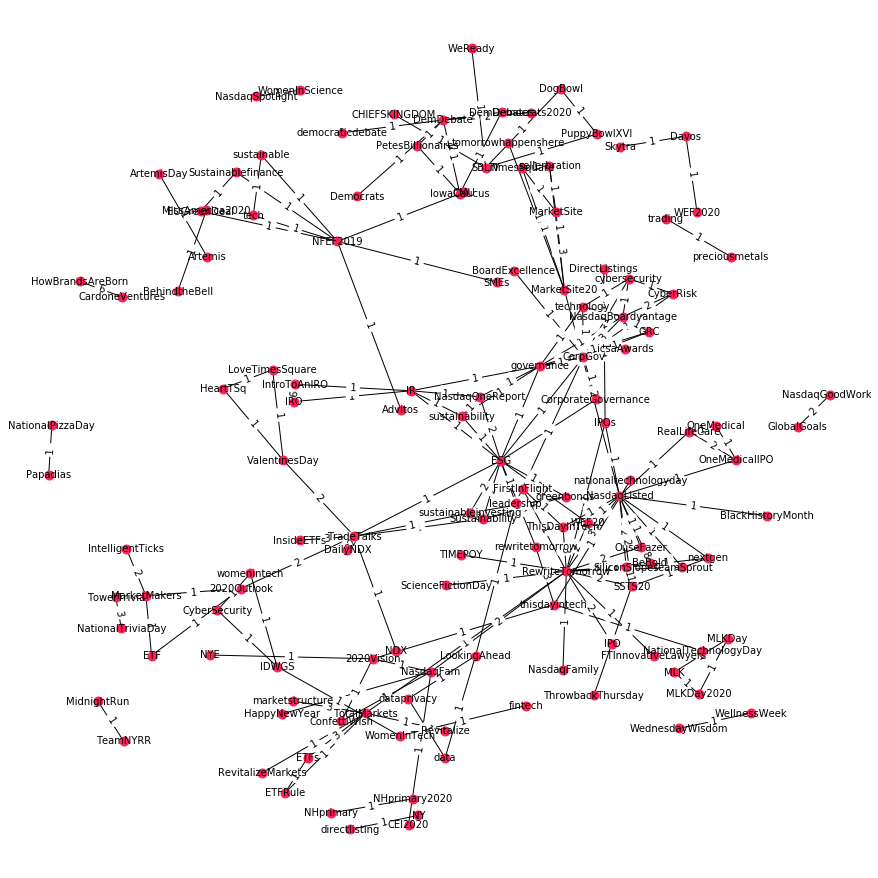

In [166]:
plt.figure( figsize=(12,12) ) 
# apply layout algorithm to calculate node positions
pos = nx.spring_layout( g, k=0.3 )
# draw the nodes and edges
nx.draw(g, pos, with_labels = True, node_size=80, font_size=10, node_color="#ff1e56")
# now add the edge weights as labels
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos,edge_labels=labels);

In [167]:
print("Number of nodes for Hashtag-co-occurence network: ", g.number_of_nodes())
print("Number of edges for Hashtag-co-occurence network: ", g.number_of_edges())
print("Density of Hashtag-co-occurence network: ", nx.density(g))
print("Is Hashtag-co-occurence network directed?: ", nx.is_directed(g))

Number of nodes for Hashtag-co-occurence network:  133
Number of edges for Hashtag-co-occurence network:  172
Density of Hashtag-co-occurence network:  0.019594440647072227
Is Hashtag-co-occurence network directed?:  False


In [171]:
#Displaying ranking of the nodes by their degree centrality
deg_5 = nx.degree_centrality(g)
s_5 = pd.Series(deg_5)
dataset_5 = pd.DataFrame(s_5,columns=["degree_centrality"])

#Measuring betweenness centrality to find brokers or bridging nodes in a network
bet_5 = nx.betweenness_centrality(g)
dataset_5["betweenness"] = pd.Series(bet_5)

#Closeness centrality means the extent to which a node is close to all other nodes in a network, 
#directly or indirectly

close_5 = nx.closeness_centrality(g)
dataset_5["closeness"] = pd.Series(close_5)


# display the DataFrame sorted by degree centrality
dataset_5.sort_values(['degree_centrality', 'betweenness'],ascending=False).head(10)



,degree_centrality,betweenness,closeness
RewriteTomorrow,0.128788,0.149375,0.211871
NasdaqListed,0.106061,0.099757,0.201420
ESG,0.098485,0.209557,0.220180
CorpGov,0.083333,0.041445,0.172756
governance,0.068182,0.017571,0.170786
TradeTalks,0.060606,0.081656,0.174096
NFEF2019,0.053030,0.002198,0.053030
TotalMarkets,0.045455,0.042679,0.161571
IR,0.045455,0.017349,0.166976
DemDebate,0.045455,0.001446,0.045455


In [169]:
# Get ranking of the nodes, where 1 indicates the highest rank
ds5=dataset_5["betweenness"].rank(ascending = False)
ds5.sort_values()

ESG                       1.0
RewriteTomorrow           2.0
WEF20                     3.0
NasdaqListed              4.0
TradeTalks                5.0
                         ... 
SMEs                     85.5
BoardExcellence          85.5
DirectListings           85.5
HappyNewYear             85.5
NationalTechnologyDay    85.5
Name: betweenness, Length: 133, dtype: float64


**_<font color= blue>Analysis of the Hashtag Co-occurence Network: </font>_**
> - a) Here each node will correspond to a hashtag appearing in one or more of the tweets of list users.
> - b) Through our weighted in-degree values, we note that Tradetalks and Daily NDX have the highest values.
> - c) Our characteristics also confirm that the network is not directed
> - d) Also,based on our centrality measures, Rewrite tomorrow have the highest stats and prove to be the most important nodes.
> - e) ESG have the highest rank in terms of betweeness 

# Conclusion

**_<font color= blue>Concluding our analysis: </font>_**
> - Through this assignment, I was able to gain an understanding of visualising and constructing different types of networks inside a twitter dataset.
> - I was able to gain a better understanding of each of the different types of networks and why they give certain outputs which make them differ from each other.